# Data Preprocessing Tools

## Importing the libraries

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Loading

In [8]:



# Load the dataset
df = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv', encoding='latin', header=None)

# Display the first few rows
df.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df = df.drop(['id', 'date', 'query','user_id'], axis = 1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
# Unique values in column 'sentiment'
print(df['sentiment'].unique())

[0 4]


In [12]:
# Map 0-negative, 4-positive
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})
print(df)

        sentiment                                               text
0        negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        negative  is upset that he can't update his Facebook by ...
2        negative  @Kenichan I dived many times for the ball. Man...
3        negative    my whole body feels itchy and like its on fire 
4        negative  @nationwideclass no, it's not behaving at all....
...           ...                                                ...
1599995  positive  Just woke up. Having no school is the best fee...
1599996  positive  TheWDB.com - Very cool to hear old Walt interv...
1599997  positive  Are you ready for your MoJo Makeover? Ask me f...
1599998  positive  Happy 38th Birthday to my boo of alll time!!! ...
1599999  positive  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


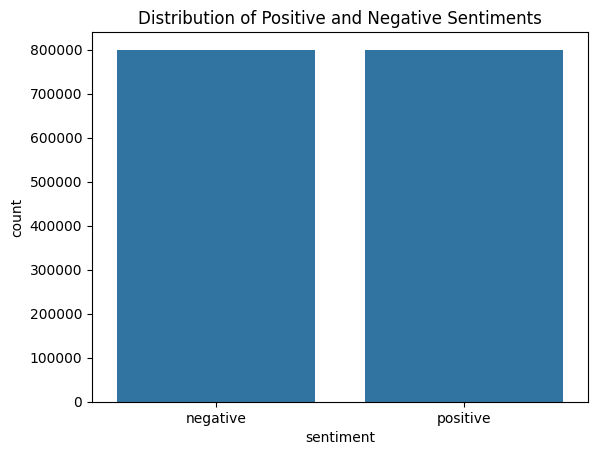

In [13]:
# Distribution of positive and negative sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Positive and Negative Sentiments')
plt.show()

# Preprocessing

In [14]:
# Removing URLs, Mentions and Websites
def remove_url_mention(text):
    # Define regex patterns
    url_pattern = r'https?://\S+|www\.\S+'
    mention_pattern = r'@\w+'
    site_pattern = r'\b\w+\.com\b'
    
    # Remove URLs, mentions, websites
    text = re.sub(url_pattern, '', text)  
    text = re.sub(mention_pattern, '', text) 
    text = re.sub(site_pattern, '', text)
    
    return text.strip()
def remove_url_mention_call(text):
    return remove_url_mention(text)
df['wo_url'] = df['text'].apply(remove_url_mention_call)

In [15]:
# Remove Punctuations
translator = str.maketrans('', '', string.punctuation)
def remove_punctuations(text):
    return text.translate(translator)
df['wo_punc'] = df['wo_url'].apply(remove_punctuations)

In [16]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    temp = []
    for word in str(text).split():
        if word not in stop_words:
            temp.append(word)
    return " ".join(temp)
def remove_stopwords_call(text):
    return remove_stopwords(text)
df["wo_stop"] = df["wo_punc"].apply(remove_stopwords_call)

In [17]:
# Remove hashtags
stop_words = set(stopwords.words('english'))
def remove_hashtags(text):
    temp = []
    for word in str(text).split():
        if word[0]!="#":
            temp.append(word)
    return " ".join(temp)
def remove_hashtags_call(text):
    return remove_hashtags(text)
df["wo_tags"] = df["wo_stop"].apply(remove_hashtags_call)

In [19]:
# Apply Stemming
stemmer = PorterStemmer()
def stem_words(text):
    temp = []
    for word in text.split():
        temp.append(stemmer.stem(word))
    return " ".join(temp)
def stem_words_call(text):
    return stem_words(text)
df["cleaned_text"] = df["wo_tags"].apply(stem_words)
print(df)

        sentiment                                               text  \
0        negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1        negative  is upset that he can't update his Facebook by ...   
2        negative  @Kenichan I dived many times for the ball. Man...   
3        negative    my whole body feels itchy and like its on fire    
4        negative  @nationwideclass no, it's not behaving at all....   
...           ...                                                ...   
1599995  positive  Just woke up. Having no school is the best fee...   
1599996  positive  TheWDB.com - Very cool to hear old Walt interv...   
1599997  positive  Are you ready for your MoJo Makeover? Ask me f...   
1599998  positive  Happy 38th Birthday to my boo of alll time!!! ...   
1599999  positive  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                    wo_url  \
0        - Awww, that's a bummer.  You shoulda got Davi...   
1        is

In [ ]:
# Using Only 20% of Dataset
df_sampled = df.sample(frac=0.2, random_state=1)
X = df_sampled['cleaned_text']
y = df_sampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(256000,)
(64000,)


In [ ]:

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vocab_size = len(vectorizer.vocabulary_)
print(f'Vocabulary Size: {vocab_size}')




Vocabulary Size: 106430


# Random Forest Classifier

In [22]:
# Model training
model = RandomForestClassifier(n_estimators=20)
history = model.fit(X_train_vec, y_train)

In [23]:
# Model evaluation
y_pred = model.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7535
              precision    recall  f1-score   support

    negative       0.74      0.79      0.76     31843
    positive       0.77      0.72      0.75     32157

    accuracy                           0.75     64000
   macro avg       0.75      0.75      0.75     64000
weighted avg       0.75      0.75      0.75     64000



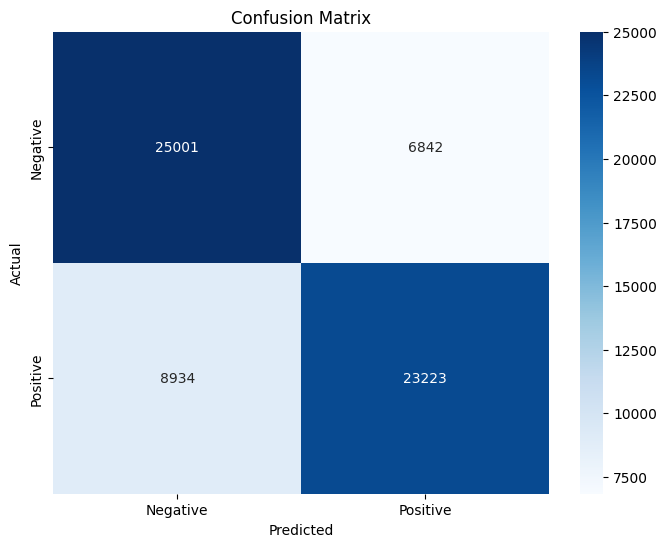

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Naive Byes

In [25]:
# Split dataset and vectorize features
X_nb = df['cleaned_text']
y_nb = df['sentiment']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=1)

vectorizer_nb = TfidfVectorizer()
X_train_vec_nb = vectorizer.fit_transform(X_train_nb)
X_test_vec_nb = vectorizer.transform(X_test_nb)

# Model Training
model = MultinomialNB()
model.fit(X_train_vec_nb, y_train_nb)

MultinomialNB()

In [26]:
# Model evaluation
y_pred_nb = model.predict(X_test_vec_nb)
print(f'Accuracy: {accuracy_score(y_test_nb, y_pred_nb)}')
print(classification_report(y_test_nb, y_pred_nb))

Accuracy: 0.762834375
              precision    recall  f1-score   support

    negative       0.76      0.78      0.77    160156
    positive       0.77      0.75      0.76    159844

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



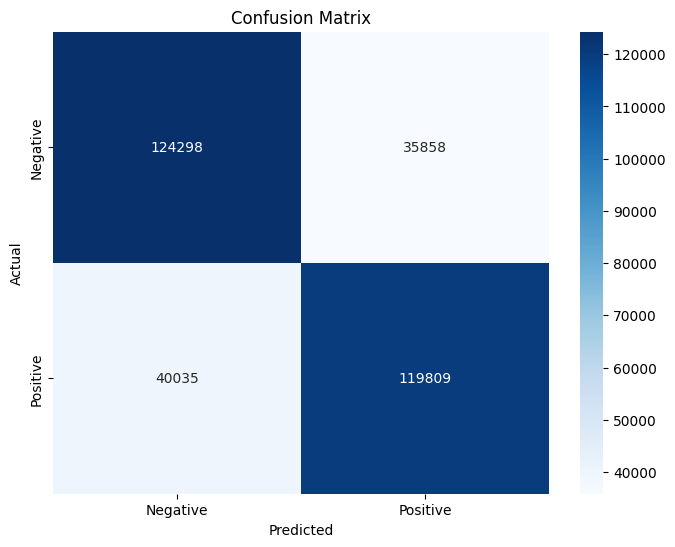

In [27]:
cm = confusion_matrix(y_test_nb, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [28]:
X_logistic_regression = df['cleaned_text']
y_logistic_regression = df['sentiment']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_logistic_regression, 
    y_logistic_regression, 
    test_size = 0.2, 
    random_state = 1
)
vectorizer_lr  = TfidfVectorizer()
X_train_vec_lr = vectorizer.fit_transform(X_train_lr)
X_test_vec_lr  = vectorizer.transform(X_test_lr)


In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_vec_lr, y_train_lr)

In [30]:
y_pred_lr = classifier.predict(X_test_vec_lr)
print(accuracy_score(y_test_lr, y_pred_lr))

0.783315625


In [31]:
print(classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

    negative       0.79      0.77      0.78    160156
    positive       0.77      0.80      0.79    159844

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



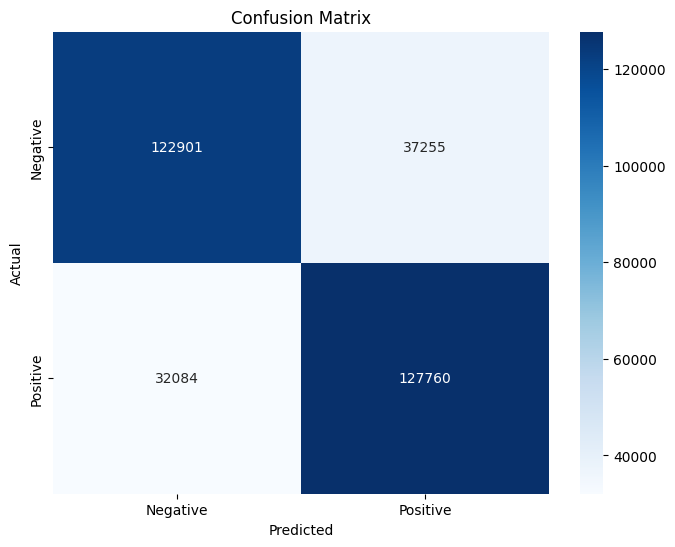

In [32]:
cm = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()